# ASSIGNMENT-5:FORECASTING MODELS

In [32]:
import pandas as pd
from pandas.plotting import autocorrelation_plot as ap
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [33]:
data=pd.read_csv('monthly-sunspots.csv.txt')
df1=pd.read_csv('monthly-sunspots.csv.txt')

In [34]:
data['temp']=0.0
for i in range(len(data)):
    x=data.iloc[i,0]
    y=x.split('-')
    x=y[0]+y[1]
    data.iloc[i,2]=x

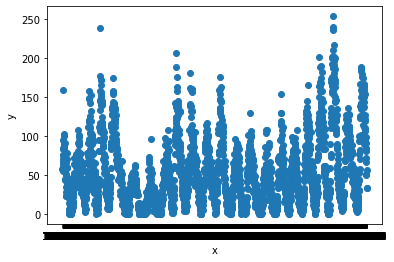

In [35]:
x=data['Month']
y=data['Sunspots']
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [36]:
#auto regressive model
X = data['temp'].values.reshape(-1,1)
y = data['Sunspots'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})


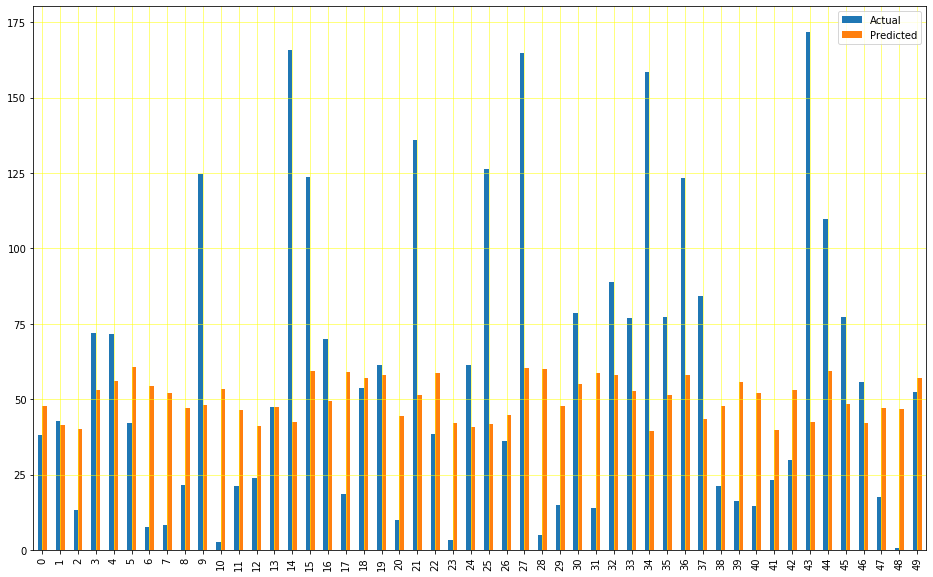

In [37]:
df1 = df.head(50)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='yellow')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue')
plt.show()

In [38]:
def mape_vectorized_v2(a, b): 
    mask = a != 0
    return (np.fabs(a - b)/a)[mask].mean()
print('MAPE:',mape_vectorized_v2(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAPE: 3.6641088052536754
Root Mean Squared Error: 44.42240620393187


/home/vimarsha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


/home/vimarsha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


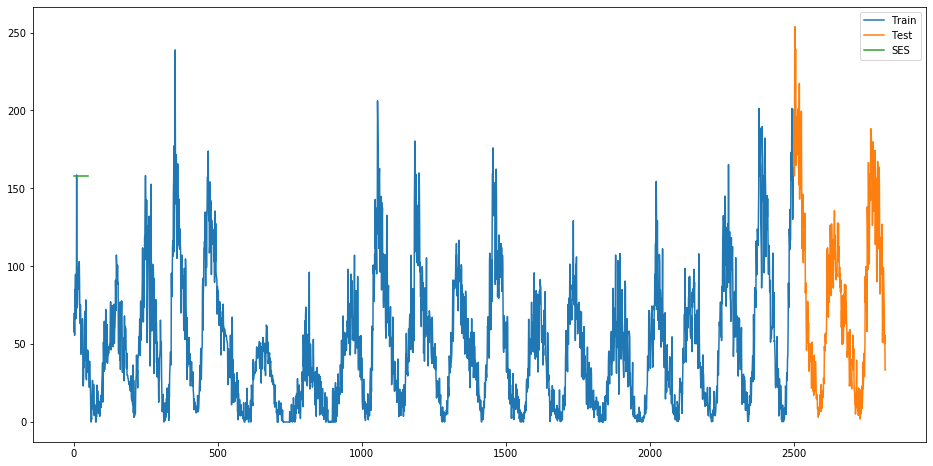

In [39]:
#Single exponential smoothing
import sys
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = df1.copy()
train=data.iloc[0:2500,0:2]
test=data.iloc[2500:,0:2]
time1=train['Sunspots']
time_log=np.log(time1)
fit2 = SimpleExpSmoothing(np.asarray(time1)).fit(smoothing_level=0.2,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(df1))
plt.figure(figsize=(16,8))
plt.plot(train['Sunspots'], label='Train')
plt.plot(test['Sunspots'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [40]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test['Sunspots'].iloc[0:50], y_hat_avg['SES'])))
print('MAPE:',mape_vectorized_v2(time_log,y_hat_avg['SES']))

Root Mean Squared Error: 52.9391236332954
MAPE: 38.18172993532017


/home/vimarsha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


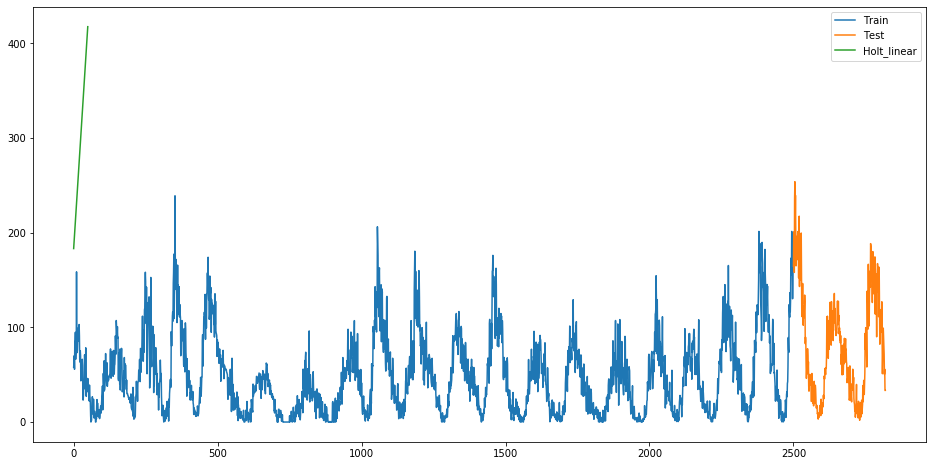

In [41]:
#Double exponential smoothing
y_hat_avg = df1.copy()
time1=train['Sunspots']
time_log=np.log(time1)
fit1 = Holt(np.asarray(time1)).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(df1))
plt.figure(figsize=(16,8))
plt.plot(train['Sunspots'], label='Train')
plt.plot(test['Sunspots'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [42]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test['Sunspots'].iloc[0:50], y_hat_avg['Holt_linear'])))
print('MAPE:',mape_vectorized_v2(time_log,y_hat_avg['Holt_linear']))

Root Mean Squared Error: 191.2978126961775
MAPE: 74.64273648615402


/home/vimarsha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


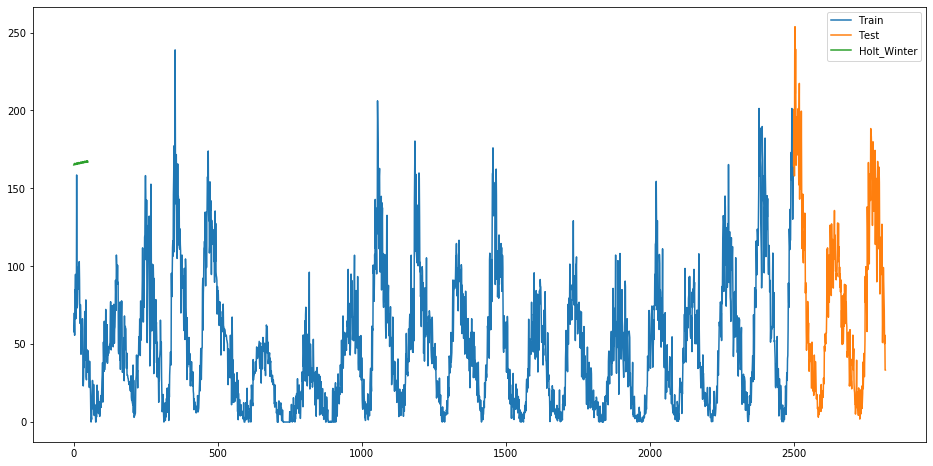

In [43]:
#Triple exponential smoothing 
y_hat_avg = df1.copy()
time1=train['Sunspots']
time_log=np.log(time1)
fit1 = ExponentialSmoothing(np.asarray(time1) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(df1))
plt.figure(figsize=(16,8))
plt.plot( train['Sunspots'], label='Train')
plt.plot(test['Sunspots'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [44]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test['Sunspots'].iloc[0:50], y_hat_avg['Holt_Winter'])))
print('MAPE:',mape_vectorized_v2(time_log,y_hat_avg['Holt_Winter']))

Root Mean Squared Error: 55.461367627526585
MAPE: 40.28793129795061
